<div style="
  padding: 18px 24px;
  margin-top: 15px;
  margin-bottom: 25px;
  border-left: 6px solid var(--jp-info-color0);
  background: var(--jp-layout-color2);
  border-radius: 8px;
">
<h1 style="margin:0; color:var(--jp-ui-font-color1);">
03. Data Quality Check & Cleaning
</h1>
<p style="font-size: 1.1em; color: var(--jp-ui-font-color1); margin-top: 6px;">
Проверка качества данных и очистка
</p>
</div>


In [ ]:
import sys
from pathlib import Path

# Добавляем корень проекта в sys.path, чтобы работал `import src...`
ROOT = Path().resolve().parent if Path().resolve().name == "notebooks" else Path().resolve()
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  /* color: var(--jp-ui-font-color1); */
  margin-top: 32px;
">
03.1 Проверка на дубли
</h2>

In [ ]:
# Импорты для всего ноутбука
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from utils import (
    load_clean_df,
    load_columns_mapping,
    load_raw_df,
    cm_target_categories,
    cm_target_category_label,
    cm_target_mapping,
    cm_target_order,
)

# Загрузка данных
df = load_raw_df()

# Ключ для поиска дублей - все колонки
key = df.columns.tolist()

# группы с количеством > 1
dup_groups = (
    df.groupby(key)
      .size()
      .reset_index(name='count')
      .query('count > 1')
)
print(f"Найдено дублирующихся групп: {len(dup_groups)}")
display(dup_groups)

# строки, которые считаются дублями (keep=False помечает все копии)
dups = df[df.duplicated(subset=key, keep=False)].sort_values(key)
print(f"Количество строк-дублей: {len(dups)}")

# эта строка пойдет в функцию загрузки обработаннгого датафрейма load_clean_df
# df = df.drop_duplicates().reset_index(drop=True)


Найдено дублирующихся групп: 9


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,count
5,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight,2
73,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight,2
369,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight,2
370,Female,21.0,1.52,42.0,no,yes,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight,4
526,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight,2
678,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight,2
1116,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight,2
1343,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I,15
1459,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight,2


Количество строк-дублей: 33


<div style="
  border-left: 4px solid var(--jp-warn-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>⚠️ Предупреждение:</strong><br>
Есть дублирующиеся строки, уберем их, чтобы они не приводили к дисбалансу
</div>


<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  margin-top: 32px;
">
03.2 Проверка на пропущенные значения
</h2>


In [ ]:
# Проверка на пропущенные значения
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_pct


Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
dtype: float64

<div style="
  border-left: 4px solid var(--jp-success-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>✅ Вывод:</strong><br>
Пропущенных значений не обнаружено
</div>


<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  margin-top: 32px;
">
03.3 Проверка на некорректные значения
</h2>


In [ ]:
age_issues = df[(df['Age'] < 0) | (df['Age'] > 110)]
age_issues_cnt = len(age_issues)
age_min = df['Age'].min()
age_max = df['Age'].max()
print(f'Некорректных значений возраста: {age_issues_cnt} (минимум {age_min}, максимум {age_max})')

height_issues = df[(df['Height'] <= 0) | (df['Height'] > 2.5)]
height_issues_cnt = len(height_issues)
height_min = df['Height'].min()
height_max = df['Height'].max()
print(f'Некорректных значений роста: {height_issues_cnt} (минимум {height_min}, максимум {height_max})')

weight_issues = df[(df['Weight'] <= 0) | (df['Weight'] > 200)]
weight_issues_cnt = len(weight_issues)
weight_min = df['Weight'].min()
weight_max = df['Weight'].max()
print(f'Некорректных значений веса: {weight_issues_cnt} (минимум {weight_min}, максимум {weight_max})')


Некорректных значений возраста: 0 (минимум 14.0, максимум 61.0)
Некорректных значений роста: 0 (минимум 1.45, максимум 1.98)
Некорректных значений веса: 0 (минимум 39.0, максимум 173.0)


<div style="
  border-left: 4px solid var(--jp-success-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>✅ Вывод:</strong><br>
Некорректных значений не обнаружено
</div>


<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  margin-top: 32px;
">
03.4 Проверка на выбросы (outliers)
</h2>


**Выбросы (метод IQR, границы: Q1-1.5*IQR, Q3+1.5*IQR):**

,Количество выбросов,Процент,Нижняя граница,Верхняя граница
Age,168.0,7.96,10.87,35.08
Height,1.0,0.05,1.42,1.98
Weight,1.0,0.05,2.54,170.37


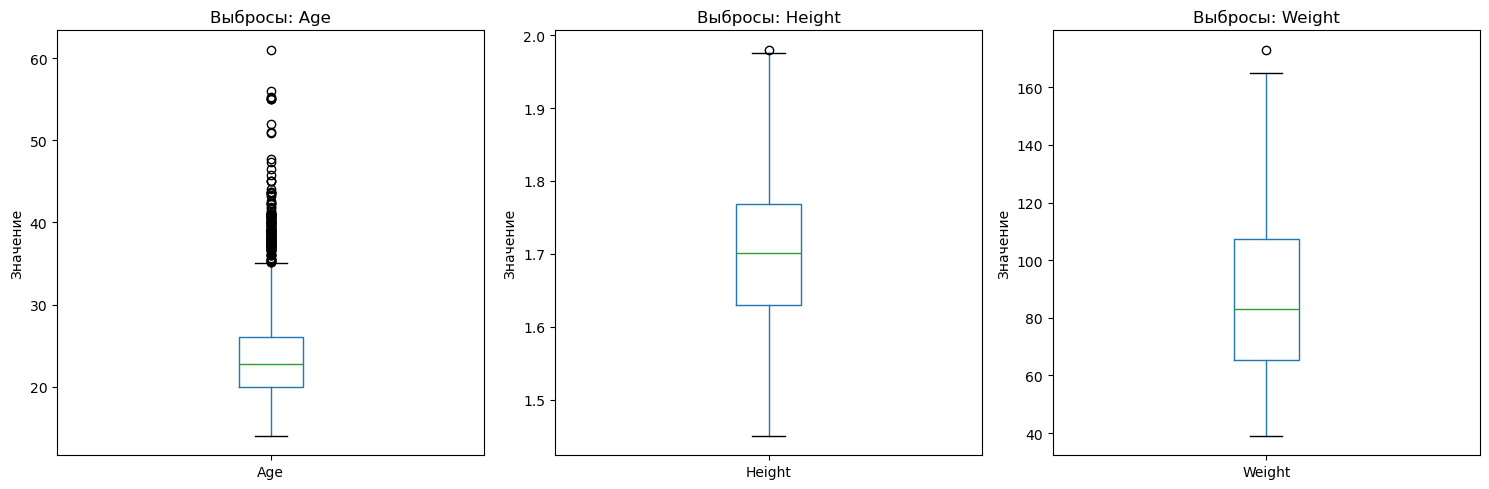

In [ ]:
# Проверка выбросов для числовых признаков методом IQR
numeric_cols = ['Age', 'Height', 'Weight']
outliers_summary = {}

for col in numeric_cols:
    if col not in df.columns:
        continue
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_summary[col] = {
        'count': len(outliers),
        'percentage': len(outliers) / len(df) * 100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

if outliers_summary:
    outliers_df = pd.DataFrame(outliers_summary).T
    outliers_df.columns = ['Количество выбросов', 'Процент', 'Нижняя граница', 'Верхняя граница']
    display(Markdown("**Выбросы (метод IQR, границы: Q1-1.5*IQR, Q3+1.5*IQR):**"))
    display(outliers_df.round(2))
    
    # Визуализация выбросов
    fig, axes = plt.subplots(1, len(numeric_cols), figsize=(5*len(numeric_cols), 5))
    if len(numeric_cols) == 1:
        axes = [axes]
    
    for ax, col in zip(axes, numeric_cols):
        if col not in df.columns:
            continue
        df.boxplot(column=col, ax=ax, grid=False)
        ax.set_title(f'Выбросы: {col}')
        ax.set_ylabel('Значение')
    
    plt.tight_layout()
    plt.show()


<div style="
  border-left: 4px solid var(--jp-warn-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>⚠️ Предупреждение:</strong><br>
Есть много выбросов по возрасту, что может снизить обобщающую силу модели. Необходимо попробовать их исключить на этапе фиче-инжиниринга.
</div>


<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  margin-top: 32px;
">
03.5 Распределение NObeyesdad по полу
</h2>


**Распределение NObeyesdad по полу (абсолютные значения):**

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II,All
Gender,,,,,,,,
Female,173,141,156,2,323,145,103,1043
Male,99,146,195,295,1,145,187,1068
All,272,287,351,297,324,290,290,2111


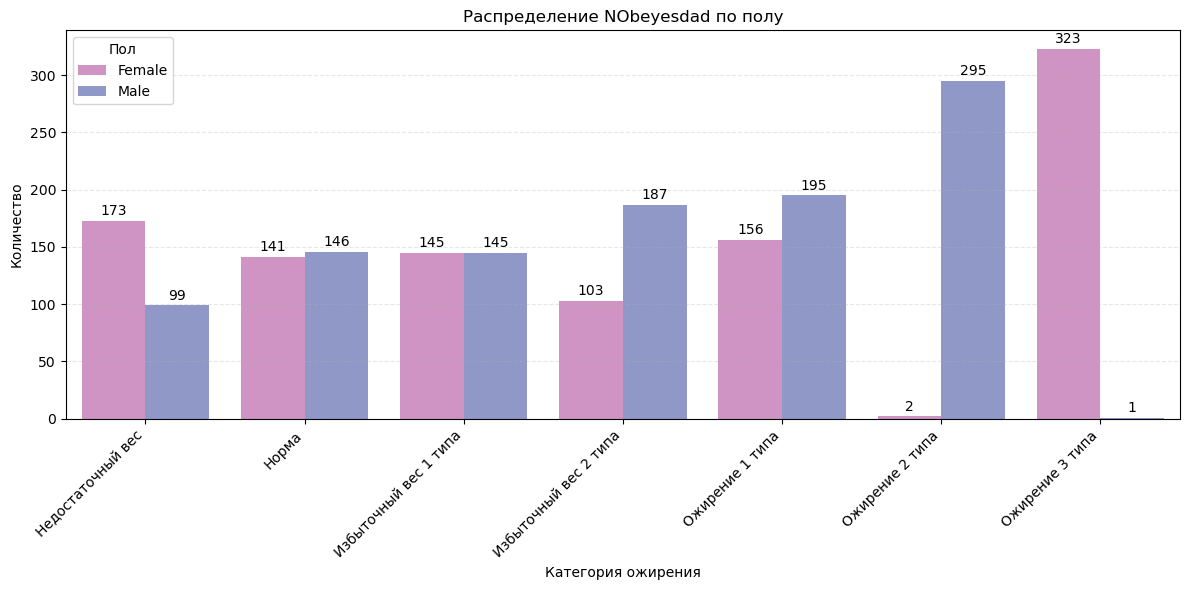

In [ ]:
import seaborn as sns

# Проверка распределения целевой переменной по полу

def plot_target_by_gender(df_input, target_col, cm, colors=None, title=None):
    """Строит кросстаб и barplot по полу для заданной целевой переменной."""
    colors = colors or ["#DA8ACA", "#8792D1"]

    display(Markdown(f"**Распределение {target_col} по полу (абсолютные значения):**"))
    crosstab = pd.crosstab(df_input["Gender"], df_input[target_col], margins=True)
    display(crosstab)

    order = cm_target_order(target_col) or []
    categories = cm_target_categories(target_col)
    label_map = {k: cm_target_category_label(target_col, k) for k in categories.keys()}

    crosstab_vis = pd.crosstab(df_input["Gender"], df_input[target_col])
    available_cols = [col for col in order if col in crosstab_vis.columns]
    if not available_cols:
        available_cols = list(crosstab_vis.columns)
    crosstab_vis = crosstab_vis[available_cols]

    long_df = (
        crosstab_vis.reset_index()
        .melt(id_vars="Gender", var_name=target_col, value_name="count")
    )

    fig, ax = plt.subplots(figsize=(max(12, 1.3 * len(available_cols)), 6))
    sns.barplot(
        data=long_df,
        x=target_col,
        y="count",
        hue="Gender",
        order=available_cols,
        palette=colors,
        ax=ax,
    )

    plot_title = title or f"Распределение {target_col} по полу"
    ax.set_title(plot_title)
    ax.set_xlabel("Категория ожирения")
    ax.set_ylabel("Количество")
    ax.set_xticks(np.arange(len(available_cols)))
    ax.set_xticklabels([label_map.get(col, col) for col in available_cols], rotation=45, ha="right")

    for container in ax.containers:
        ax.bar_label(container, fmt="%d", padding=2)

    ax.legend(title="Пол")
    ax.grid(axis="y", alpha=0.3, linestyle="--")
    plt.tight_layout()
    plt.show()

cm = load_columns_mapping()
plot_target_by_gender(
    df,
    "NObeyesdad",
    cm,
    title="Распределение NObeyesdad по полу",
)


<div style="
  border-left: 4px solid var(--jp-warn-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>⚠️ Предупреждение:</strong><br>
Есть явный дисбаланс по полу в группах ожирения 2 и 3 типа. Необходимо объединить эти два типа, чтобы выравнять баланс по полу.

Также есть проблема в определении границ типа для избыточного веса, вот что дано в условиях задачи:
- Недостаточным весом менее 18,5
- Обыкновые с 18,5 до 24,9
- Избыточный вес от 25,0 до 29,9
- Ожирение I от 30,0 до 34,9
- Ожирение II от 35,0 до 39,9
- Ожирение III выше 40
</div>


<div style="
  border-left: 4px solid var(--jp-success-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>✅ Решение:</strong><br>
Избыточный вес 1 и 2 типа объединим в одну категорию "Избыточный вес". Аналогично поступим с ожирением 1, 2 и 3 типов, объединив их в категорию "Ожирение". (3 тип ожирения можно было бы не объединять, но кажется отдельно он не очень полезен)
</div>


<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  margin-top: 32px;
">
03.6 Распределение объединенных категорий NObeyesdad по полу
</h2>


**Распределение NObeyesdad_norm по полу (абсолютные значения):**

NObeyesdad_norm,Insufficient_Weight,Normal_Weight,Obesity,Overweight,All
Gender,,,,,
Female,173,141,481,248,1043
Male,99,146,491,332,1068
All,272,287,972,580,2111


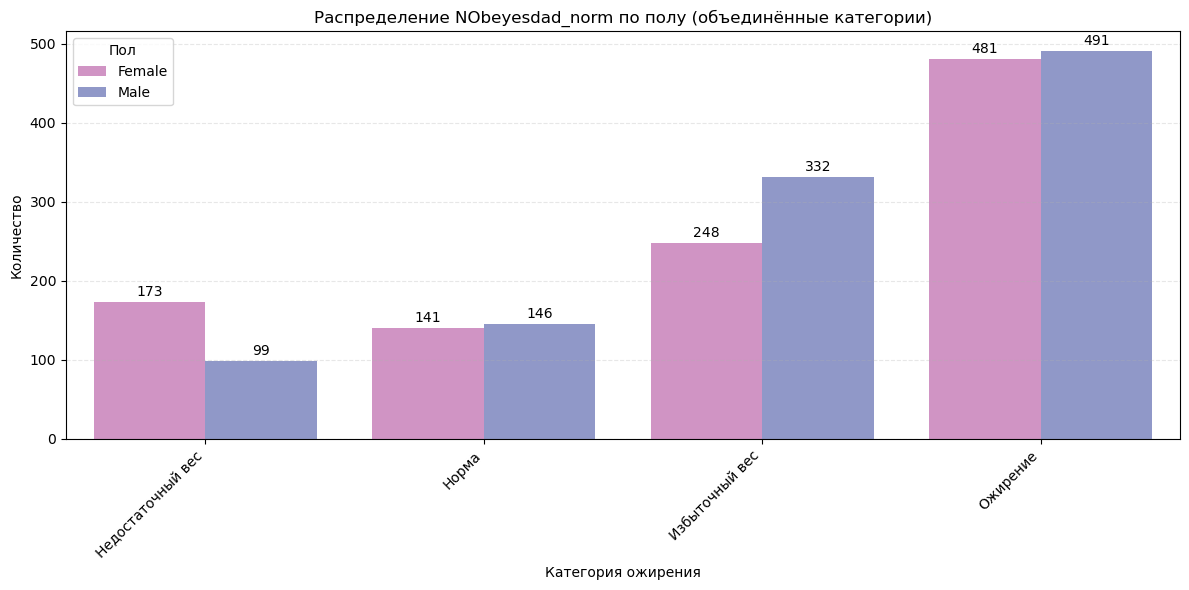

In [ ]:
# Распределение нормализованной целевой переменной по полу
mapping_norm = cm_target_mapping("NObeyesdad_norm")
df_norm = df.assign(NObeyesdad_norm=df["NObeyesdad"].map(mapping_norm))

plot_target_by_gender(
    df_norm,
    "NObeyesdad_norm",
    cm,
    title="Распределение NObeyesdad_norm по полу (объединённые категории)",
)

# в функцию load_clean_df() внесено соответствующее укрупненеи категорий


<div style="
  border-left: 4px solid var(--jp-success-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>✅ Вывод:</strong><br>
Сильного дисбаланса по полу теперь не наблюдается, но потребуется балансировка NObeyesdad_norm.
</div>


<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  margin-top: 32px;
">
03.7 Проверка согласованности данных (BMI)
</h2>


**⚠️ Найдено 25 несоответствий BMI и NObeyesdad_norm:**

,Height,Weight,BMI_calculated,NObeyesdad,NObeyesdad_norm,BMI_expected
318,1.560000,45.000000,18.491124,Normal_Weight,Normal_Weight,Insufficient_Weight
331,1.740000,56.000000,18.496499,Normal_Weight,Normal_Weight,Insufficient_Weight
497,1.560000,45.000000,18.491124,Normal_Weight,Normal_Weight,Insufficient_Weight
524,1.550648,44.641796,18.565866,Insufficient_Weight,Insufficient_Weight,Normal_Weight
549,1.610863,49.516027,19.082206,Insufficient_Weight,Insufficient_Weight,Normal_Weight
564,1.793926,59.682591,18.545503,Insufficient_Weight,Insufficient_Weight,Normal_Weight
567,1.699568,54.987740,19.036573,Insufficient_Weight,Insufficient_Weight,Normal_Weight
782,1.721903,72.748903,24.536301,Overweight_Level_I,Overweight,Normal_Weight
784,1.551288,54.932420,22.826739,Overweight_Level_I,Overweight,Normal_Weight
786,1.588597,62.339003,24.702015,Overweight_Level_I,Overweight,Normal_Weight


**Статистика несоответствий по нормализованным категориям:**

,Количество
NObeyesdad_norm,
Overweight,16
Insufficient_Weight,4
Normal_Weight,3
Obesity,2


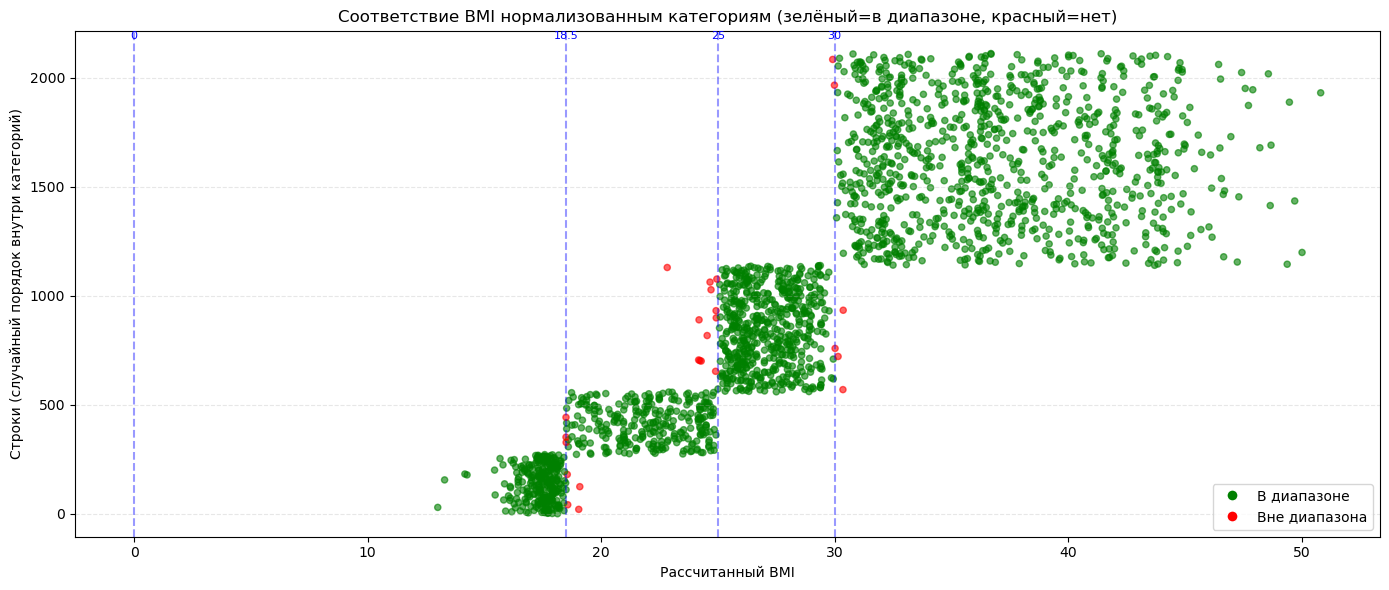

In [ ]:
# Расчет BMI и проверка соответствия категориям ожирения на основе NObeyesdad_norm
required_cols = {"Height", "Weight", "NObeyesdad"}
if not required_cols.issubset(df.columns):
    display(Markdown("**⚠️ Нужны столбцы Height, Weight и NObeyesdad для проверки BMI**"))
else:
    cm = load_columns_mapping()
    mapping = cm_target_mapping("NObeyesdad_norm")
    categories = cm_target_categories("NObeyesdad_norm")
    order = cm_target_order("NObeyesdad_norm") or []
    if not mapping or not categories:
        display(Markdown("**⚠️ В columns_mapping.yml нет mapping/categories для NObeyesdad_norm**"))
    else:
        df_check = df.copy()
        df_check["BMI_calculated"] = df_check["Weight"] / (df_check["Height"] ** 2)

        # Добавляем нормализованную категорию, если её нет
        if "NObeyesdad_norm" not in df_check:
            df_check["NObeyesdad_norm"] = df_check["NObeyesdad"].map(mapping)

        # Функция для определения ожидаемой категории по BMI
        def bmi_to_category(bmi_val: float) -> str | None:
            for name, meta in categories.items():
                low = meta.get("bmi_min", 0)
                high = meta.get("bmi_max", float("inf")) or float("inf")
                if low <= bmi_val < high:
                    return name
            return None

        df_check["BMI_expected"] = df_check["BMI_calculated"].apply(bmi_to_category)
        df_check["BMI_match"] = df_check["BMI_expected"] == df_check["NObeyesdad_norm"]

        mismatches = df_check.loc[~df_check["BMI_match"], [
            "Height", "Weight", "BMI_calculated", "NObeyesdad", "NObeyesdad_norm", "BMI_expected"
        ]]

        if mismatches.empty:
            display(Markdown("**✅ Все значения BMI соответствуют нормализованным категориям ожирения**"))
        else:
            display(Markdown(f"**⚠️ Найдено {len(mismatches)} несоответствий BMI и NObeyesdad_norm:**"))
            display(mismatches.head(10))
            display(Markdown("**Статистика несоответствий по нормализованным категориям:**"))
            display(mismatches["NObeyesdad_norm"].value_counts().to_frame(name="Количество"))

        # Подготовка данных для визуализации: упорядочиваем категории, внутри — случайный порядок
        rng = np.random.default_rng(42)
        extra = [c for c in df_check["NObeyesdad_norm"].dropna().unique() if c not in order]
        ordered_categories = order + extra
        df_plot = df_check.copy()
        df_plot["NObeyesdad_norm"] = pd.Categorical(
            df_plot["NObeyesdad_norm"], categories=ordered_categories, ordered=True
        )
        df_plot["shuffle"] = rng.random(len(df_plot))
        df_plot = df_plot.sort_values(["NObeyesdad_norm", "shuffle"]).reset_index(drop=True)
        df_plot["plot_idx"] = df_plot.index

        # Визуализация соответствия BMI нормализованным категориям
        color_map = df_plot["BMI_match"].map({True: "green", False: "red"})
        fig, ax = plt.subplots(figsize=(14, 6))
        scatter = ax.scatter(df_plot["BMI_calculated"], df_plot["plot_idx"], c=color_map, alpha=0.6, s=20)
        ax.set_xlabel("Рассчитанный BMI")
        ax.set_ylabel("Строки (случайный порядок внутри категорий)")
        ax.set_title("Соответствие BMI нормализованным категориям (зелёный=в диапазоне, красный=нет)")

        # Вертикальные линии по границам категорий из маппинга
        boundaries = set()
        for meta in categories.values():
            boundaries.add(meta.get("bmi_min", 0))
            bmi_max = meta.get("bmi_max")
            if bmi_max not in (None, float("inf")):
                boundaries.add(bmi_max)
        for b in sorted(boundaries):
            ax.axvline(x=b, color="blue", linestyle="--", alpha=0.4)
            ax.text(b, ax.get_ylim()[1], f"{b:g}", ha="center", va="top", fontsize=8, color="blue")

        # Легенда
        ok_patch = plt.Line2D([0], [0], marker='o', color='w', label='В диапазоне', markerfacecolor='green', markersize=8)
        bad_patch = plt.Line2D([0], [0], marker='o', color='w', label='Вне диапазона', markerfacecolor='red', markersize=8)
        ax.legend(handles=[ok_patch, bad_patch], loc='best')

        ax.grid(axis="y", alpha=0.3, linestyle="--")
        plt.tight_layout()
        plt.show()


<div style="
  border-left: 4px solid var(--jp-warn-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>⚠️ Предупреждение:</strong><br>
Есть небольшое количество вылетов категорий NObeyesdad_norm за границы индекса BMI.
</div>


<div style="
  border-left: 4px solid var(--jp-success-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>✅ Вывод:</strong><br>
Необходимо попробовать возможность предсказать данные вылеты, либо перекфалифицировать их в ошибки и исключить их из трейна.
</div>


<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  margin-top: 32px;
">
03.10 Добавление индекса BMI
</h2>


In [ ]:
# Добавление индекса массы тела (BMI) в исходный датафрейм
def add_bmi(df_input):
    if {'Height', 'Weight'}.issubset(df_input.columns):
        height_sq = pd.to_numeric(df_input['Height'], errors='coerce') ** 2
        weight = pd.to_numeric(df_input['Weight'], errors='coerce')
        df_input['BMI'] = weight / height_sq
    else:
        display(Markdown('**⚠️ Нет столбцов Height и Weight для расчёта BMI**'))
    return df_input

df = add_bmi(df)
display(df[['Height', 'Weight', 'BMI']].head())


,Height,Weight,BMI
0,1.62,64.0,24.386526
1,1.52,56.0,24.238227
2,1.80,77.0,23.765432
3,1.80,87.0,26.851852
4,1.78,89.8,28.342381


<div style="
  border-left: 4px solid var(--jp-success-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>✅ Примечание:</strong><br>
Для дальнейшего EDA добавим индекс массы тела BMI.
</div>


<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  margin-top: 32px;
">
03.11 Проверка значений каждого показателя и приведение к соответствующему типу данных
</h2>


In [ ]:
# выведем все показатели

from utils import cm_group, cm_group_rank, cm_label, plot_feature_distribution

group_rank = cm_group_rank()

info_df = pd.DataFrame({
    'feature': df.columns,
    'description_ru': [cm_label(c) for c in df.columns],
    'group_ru': [cm_group(c, default='(без группы)') for c in df.columns],
    'dtype': [str(df[c].dtype) for c in df.columns],
})

info_df['group_rank'] = info_df['group_ru'].map(lambda g: group_rank.get(g, 999))
info_df = (
    info_df.sort_values(['group_rank', 'feature'])
    .drop(columns=['group_rank'])
    .reset_index(drop=True)
)

display(info_df)



,feature,description_ru,group_ru,dtype
0,CAEC,Перекусы между приемами пищи,Признаки пищевых привычек,object
1,CALC,Употребление алкоголя,Признаки пищевых привычек,object
2,CH2O,Потребление воды в день,Признаки пищевых привычек,float64
3,FAVC,Частое употребление высококалорийной пищи,Признаки пищевых привычек,object
4,FCVC,Частота употребления овощей,Признаки пищевых привычек,float64
5,NCP,Количество основных приемов пищи,Признаки пищевых привычек,float64
6,FAF,Частота физической активности,Признаки физического состояния,float64
7,MTRANS,Используемый транспорт,Признаки физического состояния,object
8,SCC,Самоконтроль потребления калорий,Признаки физического состояния,object
9,TUE,Время использования электронных устройств,Признаки физического состояния,float64


no              51
Sometimes     1765
Frequently     242
Always          53
Name: count, dtype: int64

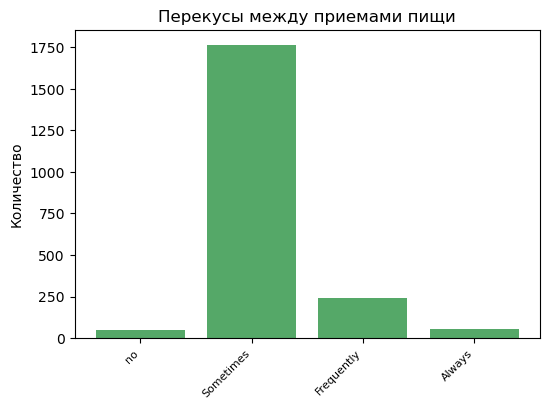

In [ ]:
display(plot_feature_distribution(df, "CAEC", bins=20))

<div style="
  border-left: 4px solid var(--jp-success-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>✅ Вывод:</strong><br>
Все ок, оставляем как есть. Категориальный тип данных, соотвествует анкете:  

9) Ты ешь что-нибудь между приемами пищи?
- Нет
- Иногда
- Часто
- Всегда
</div>


no             639
Sometimes     1401
Frequently      70
Always           1
Name: count, dtype: int64

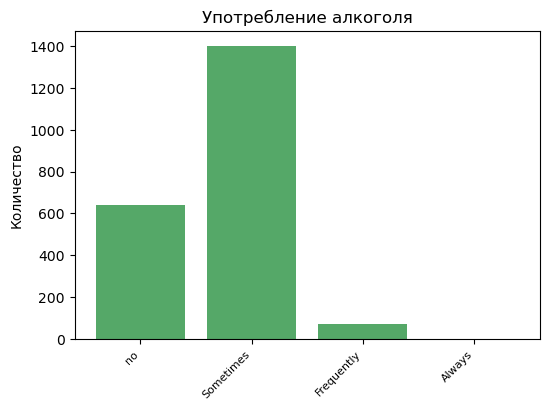

In [ ]:
display(plot_feature_distribution(df, "CALC", bins=20))

<div style="
  border-left: 4px solid var(--jp-success-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>✅ Вывод:</strong><br>
Все ок, оставляем как есть. Категориальный тип данных, соотвествует анкете:  

15) Как часто ты пьешь алкоголь?
- Я не пью
- Иногда
- Часто
- Всегда
</div>


0       2.000000
1       3.000000
2       2.000000
3       2.000000
4       2.000000
          ...   
2106    1.728139
2107    2.005130
2108    2.054193
2109    2.852339
2110    2.863513
Name: CH2O, Length: 2111, dtype: float64

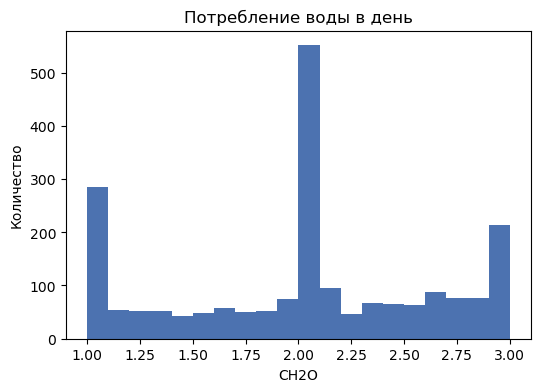

In [ ]:
display(plot_feature_distribution(df, "CH2O", bins=20))

<div style="
  border-left: 4px solid var(--jp-warn-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>⚠️ Предупреждение:</strong><br>
В анкете не предполагались дробные значения.

11) Сколько воды вы пьете в день?
- Меньше литра
- От 1 до 2 л
- Более 2 л
</div>


In [ ]:
# корректируем CH2O

df_int = pd.to_numeric(df["CH2O"], errors="coerce").round().astype("Int64")
df_map = {1: "<1", 2: "1-2", 3: ">2"}
df["CH2O"] = df_int.map(df_map)
df["CH2O"] = df["CH2O"].astype("category")



<1      485
1-2    1110
>2      516
Name: count, dtype: int64

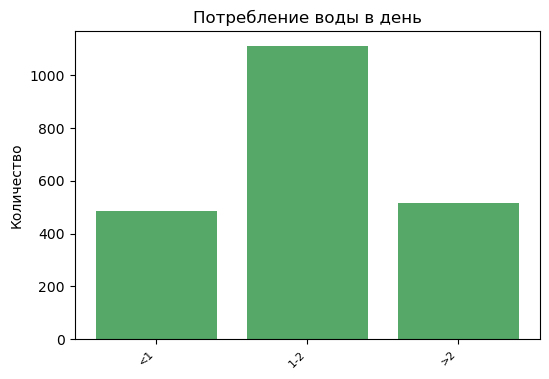

In [ ]:
display(plot_feature_distribution(df, "CH2O", bins=20))

<div style="
  border-left: 4px solid var(--jp-success-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>✅ Вывод:</strong><br>
Теперь все ок, в функцию обработки датасета load_clean_df() будет включено данное испралвение.
</div>


FAVC
yes    1866
no      245
Name: count, dtype: int64

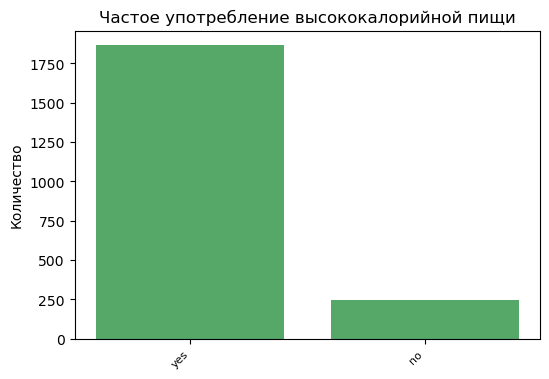

In [ ]:
display(plot_feature_distribution(df, "FAVC", bins=20))

<div style="
  border-left: 4px solid var(--jp-success-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>✅ Вывод:</strong><br>
Все ок, оставляем как есть. Категориальный тип данных, соотвествует анкете:  

6) Вы часто едите высококалорийную пищу?
- Да
- Нет
</div>

0       2.0
1       3.0
2       2.0
3       3.0
4       2.0
       ... 
2106    3.0
2107    3.0
2108    3.0
2109    3.0
2110    3.0
Name: FCVC, Length: 2111, dtype: float64

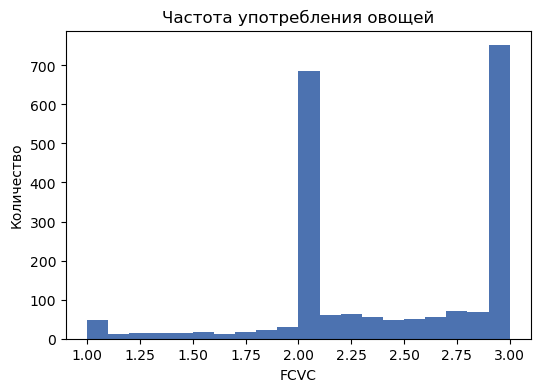

In [ ]:
display(plot_feature_distribution(df, "FCVC", bins=20))

<div style="
  border-left: 4px solid var(--jp-warn-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>⚠️ Предупреждение:</strong><br>
В анкете не предполагались дробные значения.

7) Вы обычно едите овощи во время еды?
- Никогда
- Иногда
- Всегда
</div>

In [ ]:
# корректируем FCVC

df_int = pd.to_numeric(df["FCVC"], errors="coerce").round().astype("Int64")
df_map = {1: "no", 2: "Sometimes", 3: "Always"}
df["FCVC"] = df_int.map(df_map)
df["FCVC"] = df["FCVC"].astype("category")

no            102
Sometimes    1013
Always        996
Name: count, dtype: int64

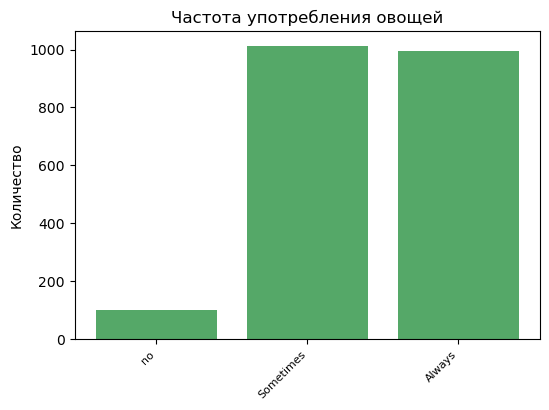

In [ ]:
display(plot_feature_distribution(df, "FCVC", bins=20))

0       3.0
1       3.0
2       3.0
3       3.0
4       1.0
       ... 
2106    3.0
2107    3.0
2108    3.0
2109    3.0
2110    3.0
Name: NCP, Length: 2111, dtype: float64

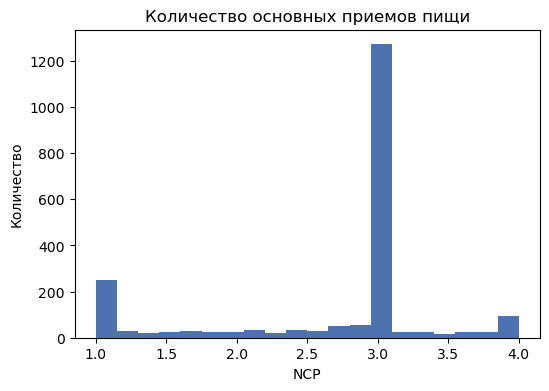

In [ ]:
display(plot_feature_distribution(df, "NCP", bins=20))

<div style="
  border-left: 4px solid var(--jp-warn-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>⚠️ Предупреждение:</strong><br>
В анкете не предполагались дробные значения.

8) Сколько основных приемов пищи вы принимаете в день?
- Между 1 и 2
- Три
- Больше трех
</div>

In [ ]:
# корректируем NCP

df_int = pd.to_numeric(df["NCP"], errors="coerce").round().astype("Int64")
df_map = {1: "1-2", 2: "1-2", 3: "3", 4: ">3"}
df["NCP"] = df_int.map(df_map)
df["NCP"] = df["NCP"].astype("category")

1-2     492
3      1470
>3      149
Name: count, dtype: int64

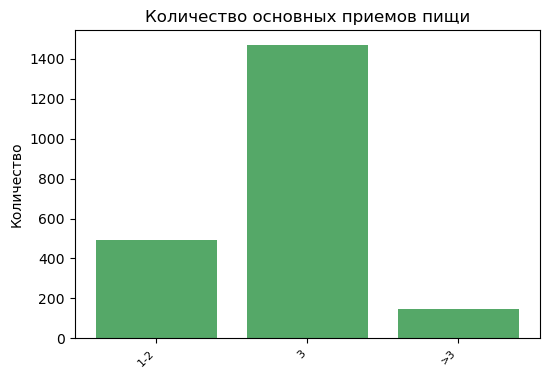

In [ ]:
display(plot_feature_distribution(df, "NCP", bins=20))

0       0.000000
1       3.000000
2       2.000000
3       2.000000
4       0.000000
          ...   
2106    1.676269
2107    1.341390
2108    1.414209
2109    1.139107
2110    1.026452
Name: FAF, Length: 2111, dtype: float64

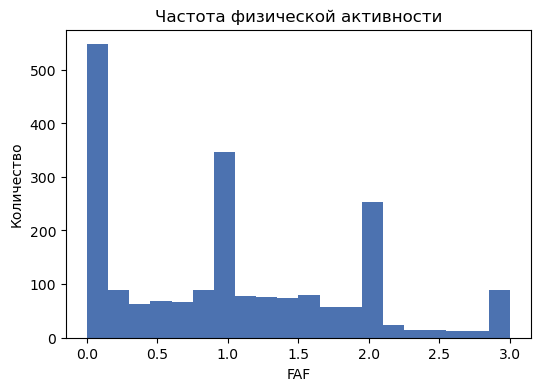

In [ ]:
display(plot_feature_distribution(df, "FAF", bins=20))

<div style="
  border-left: 4px solid var(--jp-warn-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>⚠️ Предупреждение:</strong><br>
В анкете не предполагались дробные значения.

13) Как часто вы занимаетесь физической активностью?
- Никогда
- 1 или 2 дня
- 2 или 4 дня
- 4 или 5 дней
</div>

In [ ]:
# корректируем FAF

df_int = pd.to_numeric(df["FAF"], errors="coerce").round().astype("Int64")
df_map = {0: "0", 1: "1-2", 2: "2-4", 3: "4-5"}
df["FAF"] = df_int.map(df_map)
df["FAF"] = df["FAF"].astype("category")

0      720
1-2    776
2-4    496
4-5    119
Name: count, dtype: int64

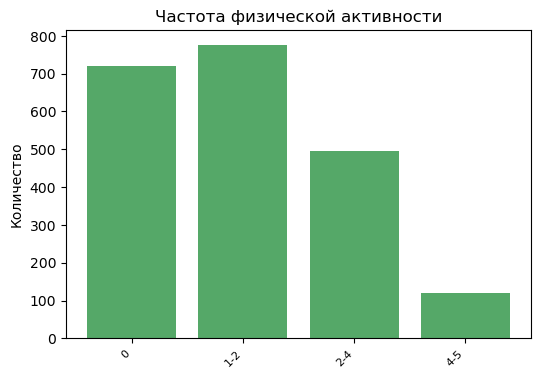

In [ ]:
display(plot_feature_distribution(df, "FAF", bins=20))

<div style="
  border-left: 4px solid var(--jp-success-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>✅ Вывод:</strong><br>
Теперь все ок, в функцию обработки датасета load_clean_df() будет включено данное испралвение.
</div>

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

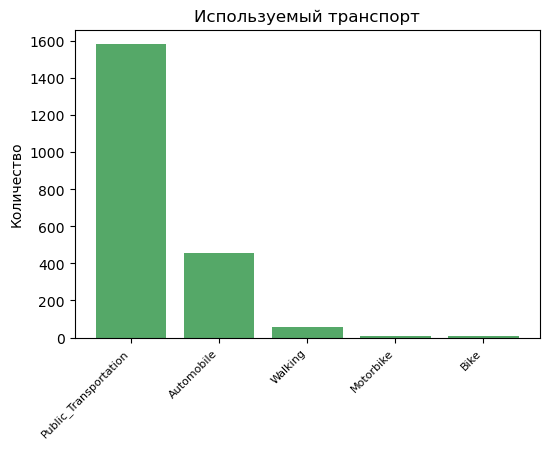

In [ ]:
display(plot_feature_distribution(df, "MTRANS", bins=20))

<div style="
  border-left: 4px solid var(--jp-success-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>✅ Вывод:</strong><br>
Все ок, оставляем как есть. Категориальный тип данных, соотвествует анкете:  

16) Каким транспортом вы обычно пользуетесь?
- Автомобиль
- Велосипед
- Мотоцикл
- Общественный Транспорт
- Ходьба
</div>

SCC
no     2015
yes      96
Name: count, dtype: int64

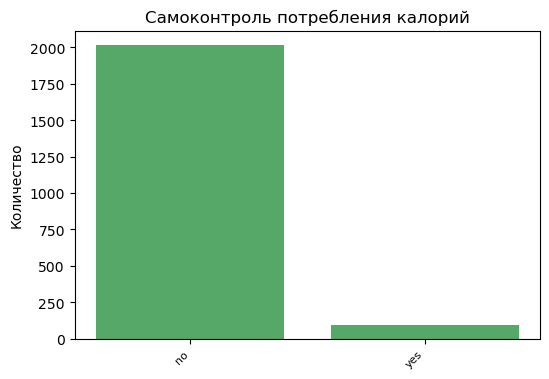

In [ ]:
display(plot_feature_distribution(df, "SCC", bins=20))

<div style="
  border-left: 4px solid var(--jp-success-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>✅ Вывод:</strong><br>
Все ок, оставляем как есть. Категориальный тип данных, соотвествует анкете:  

12) Вы контролируете количество калорий, которые вы едите каждый день?
- Да
- Нет
</div>


0       1.000000
1       0.000000
2       1.000000
3       0.000000
4       0.000000
          ...   
2106    0.906247
2107    0.599270
2108    0.646288
2109    0.586035
2110    0.714137
Name: TUE, Length: 2111, dtype: float64

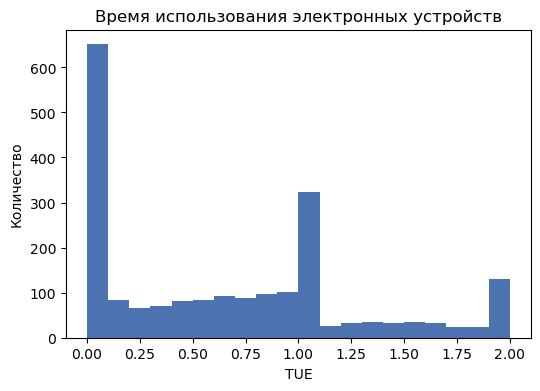

In [ ]:
display(plot_feature_distribution(df, "TUE", bins=20))

<div style="
  border-left: 4px solid var(--jp-warn-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>⚠️ Предупреждение:</strong><br>
В анкете не предполагались дробные значения.

14) Сколько времени вы используете технологические устройства, такие как мобильный телефон, видеоигры, телевизор, компьютер и другие?
- 0–2 часа
- 3-5 часов
- Более 5 часов
</div>

In [ ]:
# корректируем TUE

df_int = pd.to_numeric(df["TUE"], errors="coerce").round().astype("Int64")
df_map = {0: "0-2", 1: "3-5", 2: ">5"}
df["TUE"] = df_int.map(df_map)
df["TUE"] = df["TUE"].astype("category")

0-2    952
3-5    915
>5     244
Name: count, dtype: int64

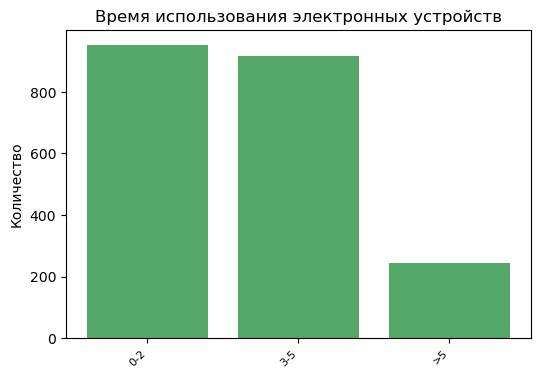

In [ ]:
display(plot_feature_distribution(df, "TUE", bins=20))

<div style="
  border-left: 4px solid var(--jp-success-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>✅ Вывод:</strong><br>
Теперь все ок, в функцию обработки датасета load_clean_df() будет включено данное испралвение.
</div>

SMOKE
no     2067
yes      44
Name: count, dtype: int64

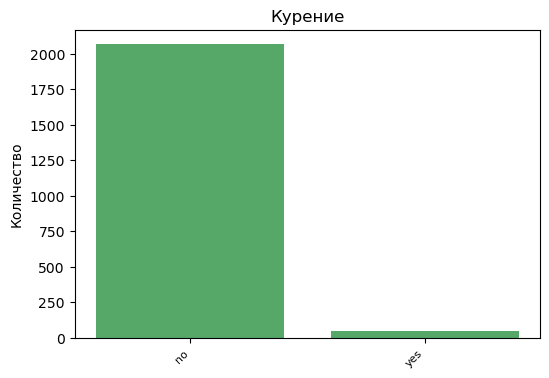

In [ ]:
display(plot_feature_distribution(df, "SMOKE", bins=20))

<div style="
  border-left: 4px solid var(--jp-success-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>✅ Вывод:</strong><br>
Все ок, оставляем как есть. Категориальный тип данных, соотвествует анкете:  

10) Ты куришь?
- Да
- Нет
</div>

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

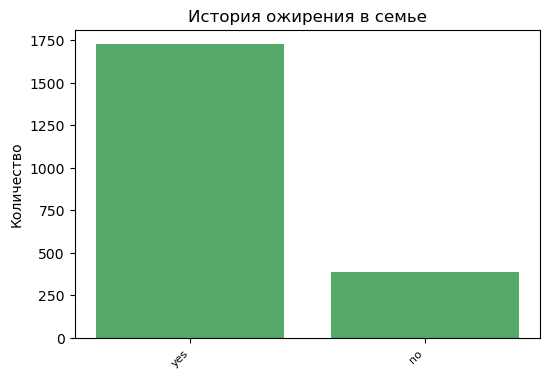

In [ ]:
display(plot_feature_distribution(df, "family_history_with_overweight", bins=20))

<div style="
  border-left: 4px solid var(--jp-success-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>✅ Вывод:</strong><br>
Все ок, оставляем как есть. Категориальный тип данных, соотвествует анкете:  

5) Страдал ли член семьи или страдает от избыточного веса?
- Да
- Нет
</div>

<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  margin-top: 32px;
">
03.12 Итоговая сводка и очистка данных
</h2>


In [ ]:
# Итоговая очистка с учётом проверок и маппинга NObeyesdad_norm
raw_df = load_raw_df()
initial_count = len(raw_df)

# load_clean_df: удаляет дубликаты и добавляет столбец NObeyesdad_norm (по mapping из columns_mapping)
df_clean = load_clean_df(column_names=None)
after_dedup = len(df_clean)

# Фильтры на явные некорректные значения (как в проверках выше)
if 'Age' in df_clean.columns:
    df_clean = df_clean[(df_clean['Age'] >= 0) & (df_clean['Age'] <= 120)]
if 'Height' in df_clean.columns:
    df_clean = df_clean[(df_clean['Height'] > 0) & (df_clean['Height'] <= 3)]
if 'Weight' in df_clean.columns:
    df_clean = df_clean[(df_clean['Weight'] > 0) & (df_clean['Weight'] <= 500)]

invalid_removed = after_dedup - len(df_clean)

# Сброс индекса
df_clean = df_clean.reset_index(drop=True)
final_count = len(df_clean)

# Итоговая сводка
display(Markdown("**📊 Итоговая сводка очистки данных:**"))
summary = pd.DataFrame({
    'Метрика': [
        'Исходное количество строк',
        'Удалено дублей',
        'Удалено некорректных значений',
        'Итоговое количество строк',
        'Процент сохраненных данных'
    ],
    'Значение': [
        initial_count,
        initial_count - after_dedup,
        invalid_removed,
        final_count,
        f"{(final_count / initial_count * 100):.2f}%"
    ]
})
display(summary)

display(Markdown(f"**✅ Очищенный датасет содержит {final_count} строк и готов к дальнейшему анализу**"))


**📊 Итоговая сводка очистки данных:**

,Метрика,Значение
0,Исходное количество строк,2111
1,Удалено дублей,24
2,Удалено некорректных значений,0
3,Итоговое количество строк,2087
4,Процент сохраненных данных,98.86%


**✅ Очищенный датасет содержит 2087 строк и готов к дальнейшему анализу**